# Implementing simple linear regression manually
### An intro to SLR

In [1]:
#import libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
#defining simple dataset
data={'bill':[34,108,64,88,99,51],'tip':[5,17,11,8,14,5]}
df=pd.DataFrame(data)

Simple linear regression is define as it follows:

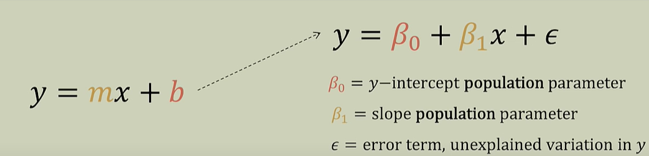

However, the previous mathematical notation has to be slightly adjusted, usually when we apply models we do it over a sample, which is a representative (should be) but smaller group from a population, the model notation changes to:

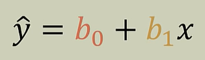

In order to have an accurate simple linear regression model, the parameter of the model should have values that minimize the distance between  the predicted point and its real value, this criterion is called  the least square criterion and it's expressed as it follows:



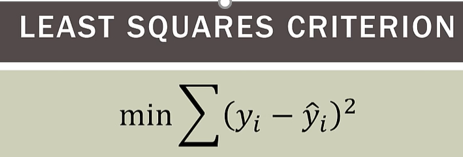

Simple linear regression is, in fact  a comparison between two models, where the first model tries to predict the outcome based on the dependant variable by itself, if there are no independant variables, best estimation is the mean of the dependant variable, lest calculate the error in that case.


In [5]:
baseline_model=df['tip']
outcome=df['tip'].mean()

#For all bill values, the best approximation using only the independant variable would be the mean which is \
#10, regardless of the bill value, tip value will be 10

10.0

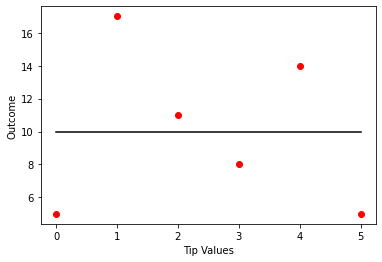

In [25]:
plt.plot(df['tip'],'ro')
plt.plot([0,5],[10,10],'k-')
plt.xlabel('Tip Values')
plt.ylabel('Outcome')
plt.show()

    Calculating the error between each prediction and its real value using a function

In [37]:
def slr_error(df):
    total_err=0
    for i in range(0,len(df)):
        err=(df['tip'][i] -10)**2
        total_err+=err
    return total_err
slr_error(df)    
#Total error is 120.
    

Now, if we develop a model, we expect the error to be less than the error of the baseline model, if that is not the case, we could say that the independant variable is not explaning the variability in the dependant variable, and consecuently such variable, and our model, is not useful.
One of the conditions to create a SLR is that there must be a linear relation between the dependant variable and the independant variable, lets check visually that.

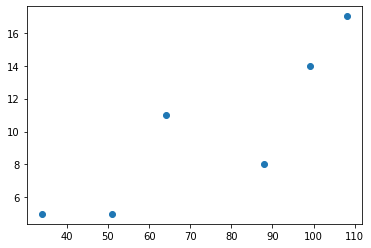

In [39]:
plt.scatter(df['bill'],df['tip'])
plt.show()

Looks like there is a linear relationship between variables, now, lets calculate the parameters using the following formulas:

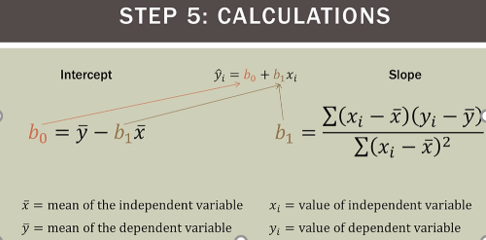

In [89]:
def slr_slope(df):
    x_mean=df['bill'].mean()
    y_mean=df['tip'].mean()
    v1=0
    v3=0
    for i in range(0,len(df)):
        sum1=(df['bill'][i]-x_mean)*(df['tip'][i]-y_mean)
        v1+=sum1
        sum3=(df['bill'][i]-x_mean)**2
        v3+=sum3
    return v1/v3

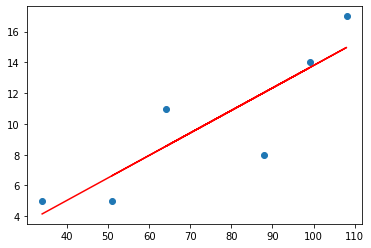

In [95]:
b1=slr_slope(df)    #slope
bo=df['tip'].mean()-b1*(df['bill'].mean())
plt.scatter(df['bill'],df['tip'])
plt.plot(df['bill'],b1*df['bill'] + bo, '-r')
plt.show()


Now, lets calculate the error.

In [96]:
def slr_error_model(df,slope,intercept):
    b1=slope
    bo=intercept
    error=0
    for i in range(0,len(df)):
        y_predict=b1*df['bill'][i] + bo
        err=(df['tip'][i]-y_predict)**2
        error+=err
    return error


In [99]:
slr_error=slr_error_model(df,b1,bo)
slr_error

30.074893009985736

In the baseline model the only way to explain error it's the variable itself, then, total error is in this case 120:
SST=SSE=120
But that error is in fact as it follows:
SST=SSE+SSR

We know that:

120=SSE+SSR
120-30=SSR
SSR=90
This says that the most part of varaibility is explained by linear regression, in this case by SLR, the amout of variability explained is:
r**2=90/120
r**2=75%

75% of total sum of squares can be explained  by using regression, the remainig part is due to error.